**INTRODUCTION**
1. Data adjustment
2. Visualize
3. Train and Test Data
4. Functions

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("C:/Users/LENOVO/Desktop/sem II/Machine Learning/ind project"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', '2 logistic-regression-titanic-dataset.ipynb', 'logistic-regression-on-titanic-dataset (1).ipynb', 'logistic-regression-on-titanic-dataset.ipynb', 'test_data.csv', 'train_data.csv']


****
> 
**1. Data Adjustment**

In [4]:
train_data = pd.read_csv("C:/Users/LENOVO/Desktop/sem II/Machine Learning/ind project/train_data.csv")
train_data.drop(['Unnamed: 0','PassengerId'], axis=1, inplace=True)

test_data = pd.read_csv('C:/Users/LENOVO/Desktop/sem II/Machine Learning/ind project/test_data.csv')
test_data.drop(['Unnamed: 0','PassengerId'], axis=1, inplace=True)

> 
We normalize the data.

In [5]:
train_data = (train_data - np.min(train_data)) / (np.max(train_data) - np.min(train_data))

test_data = (test_data - np.min(test_data)) / (np.max(test_data) - np.min(test_data))

****
> 
**2. Visualize**

In [6]:
train_data.head(6)

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0.0,1.0,0.268877,0.014151,0.0,0.0,1.0,0.1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.470566,0.139136,1.0,0.0,0.0,0.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.319299,0.015469,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.432749,0.103644,1.0,0.0,0.0,0.1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.432749,0.015713,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,1.0,0.344510,0.016510,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
test_data.head(6)

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0.0,1.0,0.211742,0.157703,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.374830,0.421856,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.374830,0.186186,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.334058,0.047892,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.524327,0.078852,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1.0,0.0,0.660234,0.157274,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


****
> 
**3. Train and Test Data**

In [8]:
x_train = train_data.drop('Survived', axis=1).T
y_train = train_data.iloc[:,0].values.reshape(1,-1)

x_test = test_data.drop('Survived', axis=1).T
y_test = test_data.iloc[:,0].values.reshape(1,-1)

print(' x_train: {}, y_train: {} \n x_test: {}, y_test: {}'.format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

 x_train: (14, 792), y_train: (1, 792) 
 x_test: (14, 100), y_test: (1, 100)


****
> 
**4. Functions**

In [9]:
def initialize_weight_and_bias(dimension):
    weight = np.full((dimension, 1), 0.1)   # (dimension,1) is shape number and values of weight are 0.1
    bias = 0.0
    
    return weight, bias


def sigmoid(z):
    # sigmoid function formulünü kullandık. 
    
    y_head = 1 / (1 + np.exp(-z))  # np.exp(1) means "e on 1". 'e' is euler number. Approximate 2.718...
    
    return y_head

In [10]:
def forward_backward_propagation(weight, bias, x_train,y_train):
    # forward propagation
    
    z = np.dot(weight.T, x_train) + bias
    
    y_head = sigmoid(z)
    
    loss = -(1 - y_train)*np.log(1 - y_head) - y_train*np.log(y_head)
    
    cost = np.sum(loss) / x_train.shape[1]
                            # 455
    
    # backward propagation
    
    derivative_weight = np.dot(x_train, (y_head - y_train).T) / x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
    
    gradients = {"derivative_weight" : derivative_weight, 
                 "derivative_bias" : derivative_bias
                 }
    
    return cost, gradients

In [11]:
def update(weight, bias, x_train, y_train, learning_rate, number_of_iterarion):
    cost_list = []
    index = []
    
    for i in range(number_of_iterarion):
        cost, gradients = forward_backward_propagation(weight, bias, x_train, y_train)
        cost_list.append(cost)
        index.append(i)
        
        weight = weight - learning_rate * gradients["derivative_weight"]
        bias = bias - learning_rate * gradients["derivative_bias"]
        
        
    parameters = {"weight" : weight, "bias" : bias}
    
    plt.plot(index, cost_list)
    plt.xlabel('Number of Iterarion')
    plt.ylabel('Cost')
    plt.show()
    
    return parameters 

In [12]:
def predict(weight, bias, x_test):
    
    z = sigmoid(np.dot(weight.T, x_test) + bias)
    
    Y_prediction = np.zeros((1, x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0][i] <= 0.5:
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1
    
    return Y_prediction

In [13]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterarion):
    weight, bias = initialize_weight_and_bias(x_train.shape[0])
    
    parameters = update(weight, bias, x_train, y_train, learning_rate, num_iterarion)
    
    y_prediction_test = predict(parameters['weight'], parameters['bias'], x_test)
    
    print('Test accuracy: {} %'.format(100 - np.mean(np.abs(y_prediction_test - y_test)) *100))
    
    # np.abs() --> absolute value method.

> 
Finally, run!

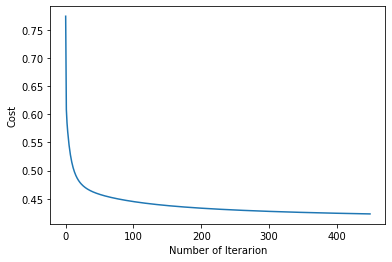

Test accuracy: 88.0 %


In [14]:
logistic_regression(x_train, y_train, x_test, y_test, 1, 450)